In [72]:
import pandas as pd
import json
import re

In [73]:
# lets transform the data into a pandas dataframe, currently it is stored in a dictionary of k=str, v=list[str]
# we will use the json module to load the data from the json file
with open('data_chan.json', 'r') as f:
    data = json.load(f)

# Create a pandas dataframe with 2 title and comment columns
df = pd.DataFrame(columns=['title', 'comment'])

# Iterate through the dictionary and append the data to the dataframe
for title, comments in data.items():
    for comment in comments:
        df = df.append({'title': title, 'comment': comment}, ignore_index=True)

In [74]:
df.head()

,title,comment
0,All the cool kids are doing it.,&gt;&gt;400714173&gt;no pepe what are you doin...
1,All the cool kids are doing it.,&gt;&gt;400708757https://www.youtube.com/watch...
2,All the cool kids are doing it.,&gt;&gt;400713918&gt;if you don&#039;t like th...
3,All the cool kids are doing it.,&gt;&gt;400708823And I wonder how many big ole...
4,All the cool kids are doing it.,&gt;&gt;400714594Vatniggers get into the meat ...


In [75]:
# lets make some preeliminary analysis on the data with spacy
import spacy
nlp = spacy.load('en_core_web_md')

In [76]:
# clean the text from 'title' and 'comment' columns
def clean_text(text):
    # make everything lowercase
    text = text.lower()
    # only lowercase letters no numbers or special characters
    text = re.sub(r'[^a-z]', ' ', text)
    
    # only accept nouns, pronouns and entities
    doc = nlp(text)
    text = [token.text for token in doc if token.pos_ in ['NOUN', 'PROPN', 'PRON', 'ADJ'] and len(token.text) > 3]
    return text

In [77]:
# apply the clean_text function to the dataframe
df['title'] = df['title'].apply(clean_text)
df['comment'] = df['comment'].apply(clean_text)

In [78]:
df.head()

,title,comment
0,"[cool, kids]","[pepe, what, body]"
1,"[cool, kids]","[https, youtube, watch, svsoh]"
2,"[cool, kids]","[richard, spencer, tier, opposition, ukrainian..."
3,"[cool, kids]","[many, brains, titanic, imagery, their, quot, ..."
4,"[cool, kids]","[vatniggers, meat, grinder]"


In [79]:
# lets create a new column with the length of the comment
df['length'] = df['comment'].apply(lambda x: len(x))

In [80]:
# lets analyze the sentiment of the comments
from spacytextblob.spacytextblob import SpacyTextBlob
nlp.add_pipe('spacytextblob')

In [81]:
# lets create a new column with the sentiment of the comment
df['sentiment'] = df['comment'].apply(lambda x: nlp(' '.join(x))._.blob.polarity)

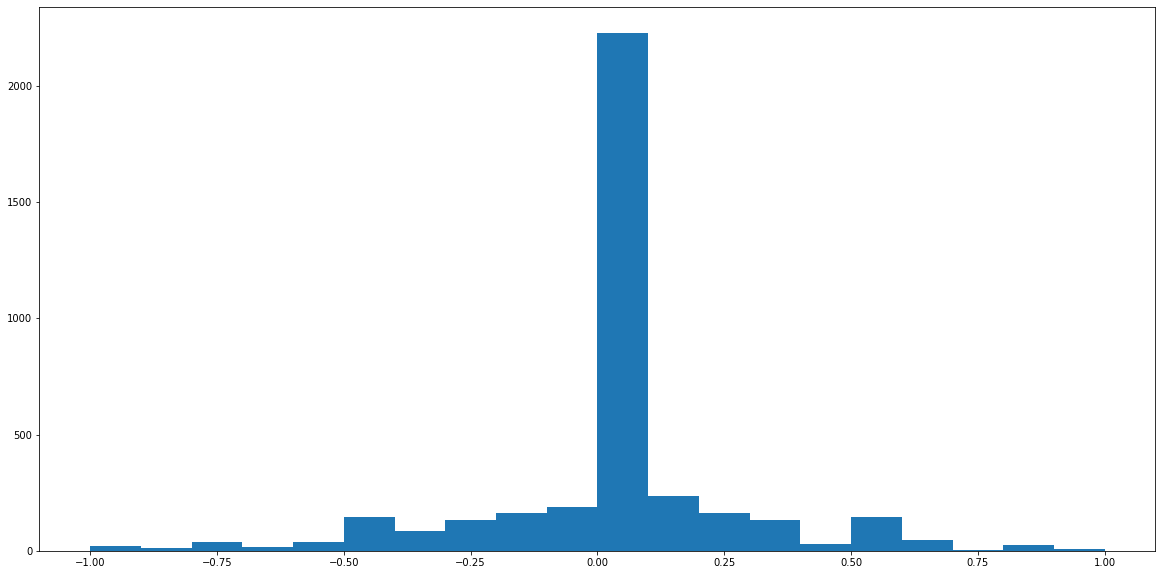

In [82]:
# lets plot the sentiment of the comments
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.hist(df['sentiment'], bins=20)
plt.show()

In [83]:
# show 5 samples of negative comments, in which sentiment is less than -0.5
df[df['sentiment'] < -0.5].sample(5)

,title,comment,length,sentiment
3593,[],"[fucking, faggot]",2,-0.6
1981,"[nishinoshima, breed, japanese, hmong, family]","[superstitious, insane]",2,-1.0
2730,"[spain, france, italians, spain, italians, gre...","[brown, hands, idiots]",3,-0.8
685,"[blabla, this, anime, dreamingthe, personality...","[board, tomboy, robot, artificial, soul]",5,-0.6
1488,"[https, foxnews, military, police, barricade, ...",[retards],1,-0.9


In [84]:
# show 5 samples of positive comments, in which sentiment is greater than 0.5
df[df['sentiment'] > 0.5].sample(5)

,title,comment,length,sentiment
448,"[dollar, store, everything, aaaaaaaaaaaaaaaahh...","[lithium, bombs, good, deal, wise]",5,0.7
2827,"[interesting, main, quot, personalities, quot,...","[great, justice]",2,0.8
1995,"[anons, silver, federal, bureau, investigation...","[bars, perfect, size, medium, sized, purchases...",7,1.0
1992,"[anons, silver, federal, bureau, investigation...","[asstroid, mining, lmao]",3,0.6
1640,"[prev, daily, battlefield, assessment, https, ...","[illustrations, version, good, soldier, svejk]",5,0.7


In [85]:
# lets create a new column with the subjectivity of the comment
df['subjectivity'] = df['comment'].apply(lambda x: nlp(' '.join(x))._.blob.subjectivity)

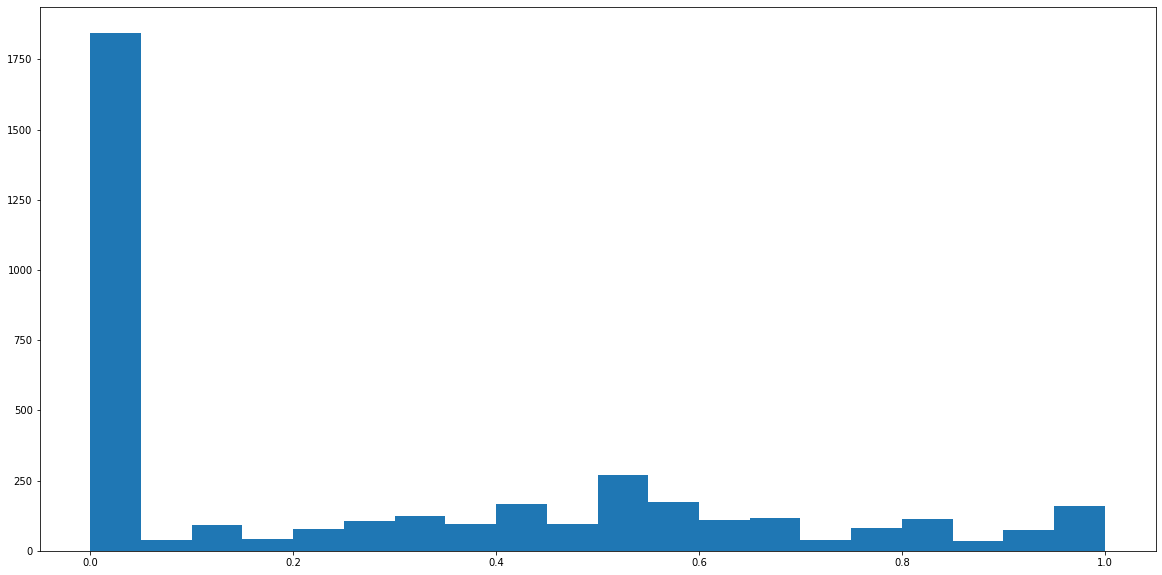

In [86]:
# lets plot the subjectivity of the comments
plt.figure(figsize=(20, 10))
plt.hist(df['subjectivity'], bins=20)
plt.show()

In [87]:
# show 5 samples of subjective comments, in which subjectivity is greater than 0.5
df[df['subjectivity'] > 0.5].sample(5)

,title,comment,length,sentiment,subjectivity
303,"[help, allies, south, korea, military, hardwar...","[taiwan, nato, there, numerous, stories, taiwa...",12,-0.200000,0.550000
2103,"[niggers, meme, realhttps, news, lifestyle, pa...","[late, father, fund, message, junk, days, junk...",113,0.083333,0.583333
1771,"[what, explanation, this, economic, collapse, ...","[stock, market, certainty, index, fund, least,...",13,-0.387500,0.525000
1004,"[cost, living, crises, inflation, food, shorta...","[high, school, lunch, anything]",4,0.160000,0.540000
2329,"[ivan, terrible, today]","[retard, that, obvious, propaganda]",4,-0.333333,0.533333


In [88]:
# show 5 samples of objective comments, in which subjectivity is less than 0.5
df[df['subjectivity'] < 0.5].sample(5)

,title,comment,length,sentiment,subjectivity
3763,"[halloween, party, college, students, host, fr...",[],0,0.000000,0.000000
3825,"[what, this, them, their, income, immigrants, ...","[they, eastern, europeans, america, there, ger...",46,-0.005208,0.253125
2316,"[russia, themits, declaration, warnuke, london...","[cuntspassive, aggressive, money, laundering, ...",6,0.000000,0.066667
3160,"[nick, fuentes, richard, spencer, cordial, cha...",[anon],1,0.000000,0.000000
2623,"[fire, https, files, catbox, krhldk]","[this, epic]",2,0.100000,0.400000


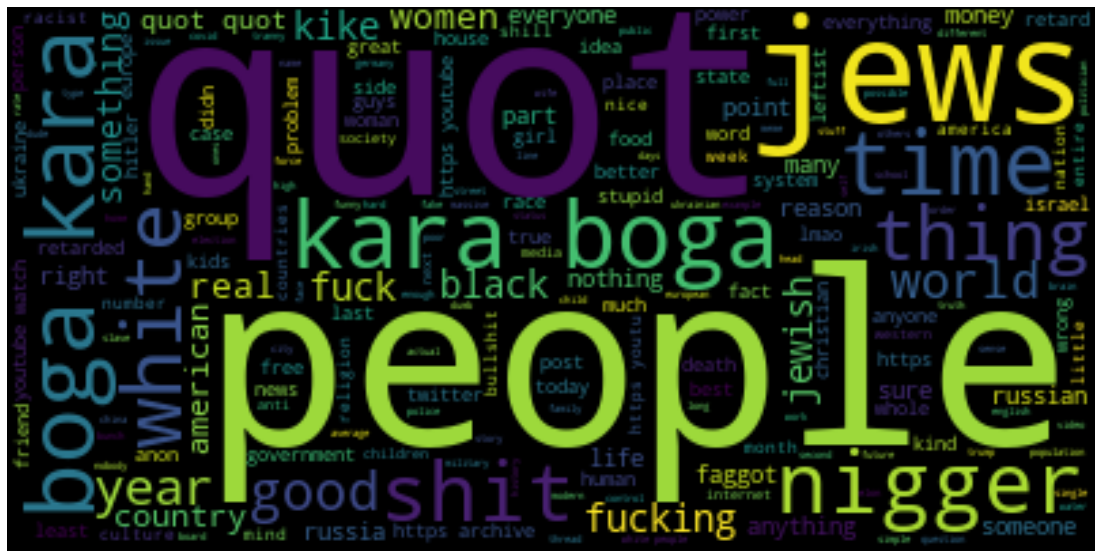

In [89]:
# lets create a word cloud of the most common words in the comments
from wordcloud import WordCloud

# create a string of all the comments
all_comments = ' '.join(df['comment'].apply(lambda x: ' '.join(x)))

# create a word cloud object
wordcloud = WordCloud().generate(all_comments)

# plot the word cloud, make it larger
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

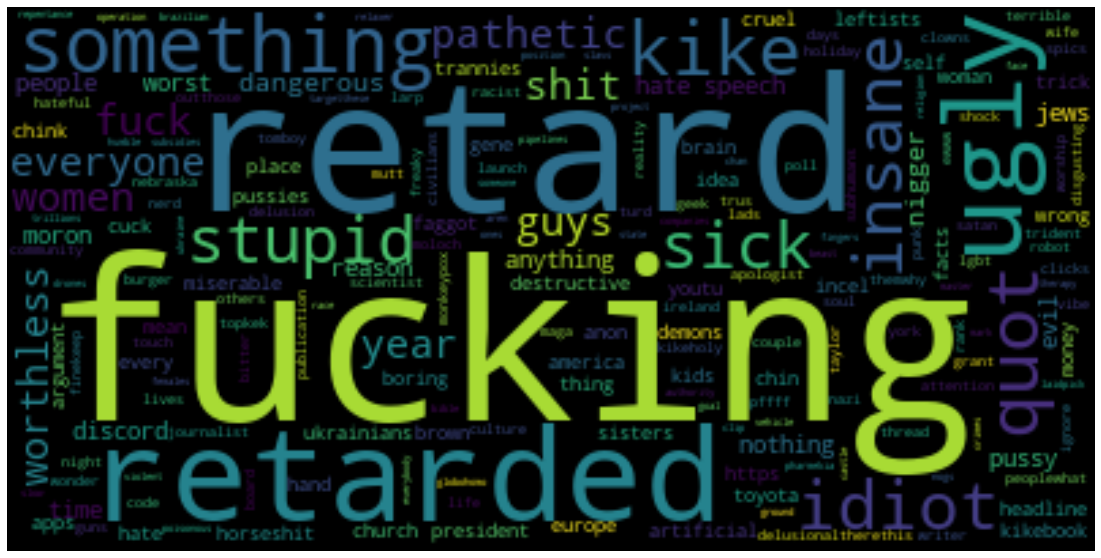

In [90]:
# lets create a word cloud of the most common words in the comments, but only for negative comments
negative_comments = ' '.join(df[df['sentiment'] < -0.5]['comment'].apply(lambda x: ' '.join(x)))

# create a word cloud object
wordcloud = WordCloud().generate(negative_comments)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [91]:
# check how many unique words are in the comments
total_unique = len(set(all_comments.split()))

# average unique words per comment
unique_words_by_comment = len(set(all_comments.split())) / len(all_comments.split())

In [92]:
# check how many total words are in the comments
total_words = len(all_comments.split())
total_words

32381

In [93]:
# check how many average words are in the comments
average_words_by_comment = len(all_comments.split()) / len(df)
average_words_by_comment

8.401920083030618

In [94]:
# load the 2 other data frames to check on hate speech
df_hate = pd.read_csv('../ethnic_slurs.csv')
df_hate.head(20)

,Term,Location,Target,Meaning
0,abbie abe abie,north america,jewish men,originated before the 1950s from the proper na...
1,abc,east asia,americanborn chinese han or other chinese incl...,the term implies an otherness or lack of conne...
2,abcd,south asians in the us,americanborn confused desi indian americans or...,used chiefly by south asian immigrants to impl...
3,abidabeed plural,middle east and north africa,black african people,arabic for slave associated with the arab slav...
4,aboabbo,australia,australian aboriginal person,originally this was simply an informal term fo...
5,afro engineering african engineering or nigger...,united states,black american people,shoddy secondrate or unconventional makeshift ...
6,ah chah,hong kong,south asian people,from cantonese yale ach from acch meaning good...
7,ali baba,united states,iraqi people,an iraqi suspected of criminal activity
8,alligator bait gator bait,united states more commonly used in states whe...,black people especially black children,first used in the early 20th century although ...
9,alpine serb,serbocroatian alpski srbin exyugoslavia,people of slovenian origin,


In [95]:
# r strip Location column
df_hate['Location'] = df_hate['Location'].apply(lambda x: x.rstrip())
df_hate.head(20)

,Term,Location,Target,Meaning
0,abbie abe abie,north america,jewish men,originated before the 1950s from the proper na...
1,abc,east asia,americanborn chinese han or other chinese incl...,the term implies an otherness or lack of conne...
2,abcd,south asians in the us,americanborn confused desi indian americans or...,used chiefly by south asian immigrants to impl...
3,abidabeed plural,middle east and north africa,black african people,arabic for slave associated with the arab slav...
4,aboabbo,australia,australian aboriginal person,originally this was simply an informal term fo...
5,afro engineering african engineering or nigger...,united states,black american people,shoddy secondrate or unconventional makeshift ...
6,ah chah,hong kong,south asian people,from cantonese yale ach from acch meaning good...
7,ali baba,united states,iraqi people,an iraqi suspected of criminal activity
8,alligator bait gator bait,united states more commonly used in states whe...,black people especially black children,first used in the early 20th century although ...
9,alpine serb,serbocroatian alpski srbin exyugoslavia,people of slovenian origin,


In [96]:
# make a set of all unique words in Term 
hate_terms = set()
for term in df_hate['Term']:
    for word in term.split():
        if len(word) < 4:
            continue
        hate_terms.add(word)

In [97]:
# check if the comments contain any of the hate words
hate_score = []
for comment in df['comment']:
    hate_count = 0
    for content in comment:
        for word in hate_terms:
            if word in content:
                hate_count += 1

    hate_score.append(hate_count)

# add the hate score to the dataframe
df['hate_score'] = hate_score
df.head()
                

,title,comment,length,sentiment,subjectivity,hate_score
0,"[cool, kids]","[pepe, what, body]",3,0.00,0.00,0
1,"[cool, kids]","[https, youtube, watch, svsoh]",4,0.00,0.00,0
2,"[cool, kids]","[richard, spencer, tier, opposition, ukrainian...",8,0.20,0.30,1
3,"[cool, kids]","[many, brains, titanic, imagery, their, quot, ...",13,0.15,0.65,0
4,"[cool, kids]","[vatniggers, meat, grinder]",3,0.00,0.00,1


In [98]:
df.head(20)

,title,comment,length,sentiment,subjectivity,hate_score
0,"[cool, kids]","[pepe, what, body]",3,0.000000,0.000000,0
1,"[cool, kids]","[https, youtube, watch, svsoh]",4,0.000000,0.000000,0
2,"[cool, kids]","[richard, spencer, tier, opposition, ukrainian...",8,0.200000,0.300000,1
3,"[cool, kids]","[many, brains, titanic, imagery, their, quot, ...",13,0.150000,0.650000,0
4,"[cool, kids]","[vatniggers, meat, grinder]",3,0.000000,0.000000,1
5,"[year, twins, their, abusive, mother, boyfrien...","[something, some]",2,0.000000,0.000000,0
6,"[year, twins, their, abusive, mother, boyfrien...",[test],1,0.000000,0.000000,0
7,"[year, twins, their, abusive, mother, boyfrien...","[they, black, nobody, this]",4,-0.166667,0.433333,1
8,"[year, twins, their, abusive, mother, boyfrien...","[true, bolivian]",2,0.350000,0.650000,0
9,"[year, twins, their, abusive, mother, boyfrien...","[bitch, your, good, women, physical, mental, h...",7,0.200000,0.314286,0


In [99]:
# get the top 5 rows with the highest hate score
df.sort_values(by='hate_score', ascending=False).head(5)

,title,comment,length,sentiment,subjectivity,hate_score
3766,[what],"[nigger, niggerniggerniggernigger, niggernigge...",16,0.000000,0.000000,16
3116,"[reddit, places]","[they, they, disproportional, amount, whites, ...",100,0.010667,0.342667,14
1788,"[kike, spike, shoah, real, https, rollingstone...","[links, social, media, https, atlasobscura, ar...",71,0.012222,0.324815,11
2511,"[whitewill, halloween, tradition, soldier, ano...","[jonathan, turley, radio, show, iotbw, https, ...",134,0.025000,0.366667,9
749,"[discussion, literal, metaphorical, interpreta...","[slaves, butthurt, rebellion, higher, dimensio...",100,0.036458,0.526389,9


In [100]:
# Get the percentage of hate score devided by the total length of the comment
df['hate_score_percentage'] = df['hate_score'] / df['length'] * 100
df.head()

,title,comment,length,sentiment,subjectivity,hate_score,hate_score_percentage
0,"[cool, kids]","[pepe, what, body]",3,0.00,0.00,0,0.000000
1,"[cool, kids]","[https, youtube, watch, svsoh]",4,0.00,0.00,0,0.000000
2,"[cool, kids]","[richard, spencer, tier, opposition, ukrainian...",8,0.20,0.30,1,12.500000
3,"[cool, kids]","[many, brains, titanic, imagery, their, quot, ...",13,0.15,0.65,0,0.000000
4,"[cool, kids]","[vatniggers, meat, grinder]",3,0.00,0.00,1,33.333333


In [102]:
# get the sum of the total hate score / sum of the total length of the comment * 100
percentage_total_hate = df['hate_score'].sum() / df['length'].sum() * 100
f"{percentage_total_hate:.2f}%"

'5.82%'